# ASSOCIATION 모의테스트_VOC 고객 해지 예측 모델링
#### 주제 : 데이터를 분석 및 전처리한 후 머신러닝과 딥러닝으로 VOC를 제기한 고객의 해지여부를 예측하고 결과를 분석하세요.

+ 각 문제의 답안코드는 반드시 '# 여기에 답안코드를 작성하세요'로 표시된 cell에 작성해주세요.
+ 문제에 제시된 가이드를 읽고 답안 작성하세요.
+ 문제에 변수명이 제시된 경우 반드시 해당 변수명을 사용하세요.
+ 본 파일과 관련 데이터 파일은 제 3자에게 공유하거나 개인적인 용도로 사용하는 등 외부로 유출할 수 없으며 유출로 인한 책임은 응시자 본인에게 있습니다.
<br>

In [1]:
# 아래 코드를 실행해주세요 (코드 실행시 경고메시지 무시)

import warnings
warnings.filterwarnings(action='ignore')

<br>

## **<span style="color:black">필요한 라이브러리 설치</span>**

**아래와 같이 pip 이용해서 seaborn을 설치하세요.**

In [2]:
# 맨 앞쪽에 ! 사용하면 리눅스 명령어를 수행할 수 있습니다.

!pip install seaborn


Defaulting to user installation because normal site-packages is not writeable


**<br>
<font color=blue>문제1. numpy 별칭을 np로, pandas 별칭을 pd로 해서 임포트하는 코드를 작성하고 실행하세요.</font>**

In [3]:
# 여기에 답안코드를 작성하세요.
# import 명령 사용
# numpy와 pandas 라이브러리 임포트

import numpy as np
import pandas as pd


**<br>
<font color=blue>문제2. matplotlib 라이브러리를 plt로, seaborn을 sns로 해서 임포트하는 코드를 작성하고 실행하세요.**

In [4]:
# 여기에 답안코드를 작성하세요.

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<br>

## **<span style="color:black">Tabular 데이터 로딩</span>**

**<br>
<font color=blue>문제3. pandas read_csv 함수를 사용하여 voc_data.csv 파일을 읽어 변수명 df에 할당하는 코드를 작성하세요.</font>**

In [5]:
# 여기에 답안코드를 작성하세요.
# 읽어올 파일명 : voc_data.csv
# 읽어온 파일을 DataFrame "df" 이름으로 저장

df = pd.read_csv('voc_data.csv')


<br>

## **<span style="color:black">데이터의 구성 확인</span>**

##### **"df" DataFrame을 이용해서 읽어들인 파일의 앞부분 5줄, 뒷부분 5줄을 출력하세요**

In [6]:
# head() 함수 사용

df.head()

,voc_trt_perd_itg_cd,voc_prod_sbt_id,voc_wjt_sorc_id,voc_type_itg_cd,voc_sttus_itg_cd,voc_trt_reslt_itg_cd,cust_clas_itg_cd,bprod_sbt_id,age_itg_cd,cont_sttus_itg_cd,...,voc_dupl_tmscnt,oos_cause_type_itg_cd,voc_trt_need_time_itg_cd,engt_cperd_type_itg_cd,engt_tgt_div_itg_cd,cont_fns_pam_date,voc_mis_pbls_yn,fclt_oos_yn,cust_snsry_base_conf_need_time,trm_yn
0,_,1000665328,2153,10009,10002,_,F,1000001126,36,10001,...,0,_,10001,_,_,99991231,N,_,0,N
1,_,1001028714,3311,10009,10002,10081,G,1000852226,32,10001,...,0,_,10001,15098,15244,20220319,N,_,0,N
2,_,1001028567,1575,10009,10002,_,G,1000851875,52,10001,...,0,10268,10001,15097,15244,20220508,N,N,0,N
3,10000,1000665328,3546,10009,10002,_,_,1000001126,_,10001,...,0,_,10001,_,_,99991231,N,_,0,N
4,_,1000779276,3086,10009,10002,_,G,1000764639,50,10001,...,0,_,10001,_,_,99991231,N,_,0,N


In [7]:
# tail() 함수 사용

df.tail()

,voc_trt_perd_itg_cd,voc_prod_sbt_id,voc_wjt_sorc_id,voc_type_itg_cd,voc_sttus_itg_cd,voc_trt_reslt_itg_cd,cust_clas_itg_cd,bprod_sbt_id,age_itg_cd,cont_sttus_itg_cd,...,voc_dupl_tmscnt,oos_cause_type_itg_cd,voc_trt_need_time_itg_cd,engt_cperd_type_itg_cd,engt_tgt_div_itg_cd,cont_fns_pam_date,voc_mis_pbls_yn,fclt_oos_yn,cust_snsry_base_conf_need_time,trm_yn
9995,_,1000811136,2123,10009,10002,_,G,1000809259,17,10001,...,0,_,10001,_,_,99991231,N,_,0,N
9996,_,1001047799,2153,10009,10002,_,I,1001046521,35,10001,...,0,_,10001,_,_,99991231,N,_,0,N
9997,_,1001027819,379,10009,10002,_,G,1000720809,51,10001,...,0,10270,10001,15097,15244,20180903,N,N,0,N
9998,_,1001027819,314,10009,10002,_,I,1000720809,_,10001,...,0,_,10001,15097,15244,20210412,N,_,0,N
9999,_,1001047802,2266,10009,10002,_,G,1001046524,27,10001,...,0,_,10001,_,_,99991231,N,_,0,N


##### 
**데이터프레임 정보(컬럼정보, Null 여부, 타입)를 출력하세요.**

In [8]:
# DataFrame의 info() 함수 활용
# 총 24개 컬럼 있음 확인

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   voc_trt_perd_itg_cd             10000 non-null  object
 1   voc_prod_sbt_id                 10000 non-null  int64 
 2   voc_wjt_sorc_id                 10000 non-null  int64 
 3   voc_type_itg_cd                 10000 non-null  int64 
 4   voc_sttus_itg_cd                10000 non-null  int64 
 5   voc_trt_reslt_itg_cd            10000 non-null  object
 6   cust_clas_itg_cd                10000 non-null  object
 7   bprod_sbt_id                    10000 non-null  int64 
 8   age_itg_cd                      10000 non-null  object
 9   cont_sttus_itg_cd               10000 non-null  object
 10  new_date                        10000 non-null  int64 
 11  opn_nfl_chg_date                10000 non-null  int64 
 12  cust_dtl_ctg_itg_cd             10000 non-null 

##### 
**데이터프레임 인덱스를 확인하세요.**

In [9]:
df.index

RangeIndex(start=0, stop=10000, step=1)

#####
 **데이터프레임 컬럼을 확인하세요.**

In [10]:
df.columns

Index(['voc_trt_perd_itg_cd', 'voc_prod_sbt_id', 'voc_wjt_sorc_id',
       'voc_type_itg_cd', 'voc_sttus_itg_cd', 'voc_trt_reslt_itg_cd',
       'cust_clas_itg_cd', 'bprod_sbt_id', 'age_itg_cd', 'cont_sttus_itg_cd',
       'new_date', 'opn_nfl_chg_date', 'cust_dtl_ctg_itg_cd',
       'voc_trt_degr_div_itg_cd', 'voc_dupl_tmscnt', 'oos_cause_type_itg_cd',
       'voc_trt_need_time_itg_cd', 'engt_cperd_type_itg_cd',
       'engt_tgt_div_itg_cd', 'cont_fns_pam_date', 'voc_mis_pbls_yn',
       'fclt_oos_yn', 'cust_snsry_base_conf_need_time', 'trm_yn'],
      dtype='object')

#####
**데이터프레임 값(value)을 확인하세요.**

In [11]:
df.values

array([['_', 1000665328, 2153, ..., '_', 0, 'N'],
       ['_', 1001028714, 3311, ..., '_', 0, 'N'],
       ['_', 1001028567, 1575, ..., 'N', 0, 'N'],
       ...,
       ['_', 1001027819, 379, ..., 'N', 0, 'N'],
       ['_', 1001027819, 314, ..., '_', 0, 'N'],
       ['_', 1001047802, 2266, ..., '_', 0, 'N']], dtype=object)

#####
**데이터프레임의 계산 가능한 값들에 대한 통계치를 확인하세요.**

In [12]:
df.describe()

,voc_prod_sbt_id,voc_wjt_sorc_id,voc_type_itg_cd,voc_sttus_itg_cd,bprod_sbt_id,new_date,opn_nfl_chg_date,voc_trt_degr_div_itg_cd,voc_dupl_tmscnt,voc_trt_need_time_itg_cd,cont_fns_pam_date,cust_snsry_base_conf_need_time
count,1.000000e+04,10000.00000,10000.00000,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.00000
mean,9.907267e+08,1578.29170,10008.52360,10002.043400,8.838173e+08,1.744283e+07,1.744505e+07,20001.074200,0.008800,10002.656800,7.004469e+07,193.88010
std,1.005780e+08,1078.63717,1.57927,0.314843,3.214229e+08,6.849207e+06,6.850077e+06,0.262109,0.103555,6.576864,3.863802e+07,6970.03853
min,-9.980000e+02,126.00000,10003.00000,10002.000000,-9.980000e+02,1.010100e+04,1.010100e+04,20001.000000,0.000000,10001.000000,2.001063e+07,0.00000
25%,1.000782e+09,360.00000,10009.00000,10002.000000,1.000003e+09,2.008053e+07,2.008123e+07,20001.000000,0.000000,10001.000000,2.021102e+07,0.00000
50%,1.001028e+09,2056.00000,10009.00000,10002.000000,1.000749e+09,2.014121e+07,2.015031e+07,20001.000000,0.000000,10001.000000,9.999123e+07,0.00000
75%,1.001036e+09,2153.00000,10009.00000,10002.000000,1.001044e+09,2.018010e+07,2.018032e+07,20001.000000,0.000000,10001.000000,9.999123e+07,0.00000
max,1.001079e+09,3856.00000,10017.00000,10005.000000,1.001078e+09,2.020041e+07,2.020041e+07,20002.000000,3.000000,10038.000000,9.999123e+07,367991.00000


#####
**DataFrame 컬럼 항목에 Null이 존재하는지 확인하세요.**

In [13]:
# DataFrame의 isnull() 함수 사용
# Null 합계를 보려면 sum() 함수 사용

df.isnull().sum()


voc_trt_perd_itg_cd               0
voc_prod_sbt_id                   0
voc_wjt_sorc_id                   0
voc_type_itg_cd                   0
voc_sttus_itg_cd                  0
voc_trt_reslt_itg_cd              0
cust_clas_itg_cd                  0
bprod_sbt_id                      0
age_itg_cd                        0
cont_sttus_itg_cd                 0
new_date                          0
opn_nfl_chg_date                  0
cust_dtl_ctg_itg_cd               0
voc_trt_degr_div_itg_cd           0
voc_dupl_tmscnt                   0
oos_cause_type_itg_cd             0
voc_trt_need_time_itg_cd          0
engt_cperd_type_itg_cd            0
engt_tgt_div_itg_cd               0
cont_fns_pam_date                 0
voc_mis_pbls_yn                   0
fclt_oos_yn                       0
cust_snsry_base_conf_need_time    0
trm_yn                            0
dtype: int64

In [14]:
df['voc_trt_perd_itg_cd']

0           _
1           _
2           _
3       10000
4           _
        ...  
9995        _
9996        _
9997        _
9998        _
9999        _
Name: voc_trt_perd_itg_cd, Length: 10000, dtype: object

#####
**voc_trt_perd_itg_cd 컬럼 데이터별 건수를 나열하세요.**

In [15]:
# df DataFrame의 'voc_trt_perd_itg_cd'컬럼에 value_counts() 함수 사용

df['voc_trt_perd_itg_cd'].value_counts()


_        5422
10000    4283
10001     163
10002      58
10003      25
10004      16
10005      10
10006       6
10008       3
10009       3
10016       2
10011       2
10012       2
10007       2
10014       1
10013       1
10015       1
Name: voc_trt_perd_itg_cd, dtype: int64

In [16]:
# [참고] voc_trt_perd_itg_cd 컬럼 데이터별 건수 비율 보기 (정규화된 형태로 출력)

df['voc_trt_perd_itg_cd'].value_counts(normalize=True)

_        0.5422
10000    0.4283
10001    0.0163
10002    0.0058
10003    0.0025
10004    0.0016
10005    0.0010
10006    0.0006
10008    0.0003
10009    0.0003
10016    0.0002
10011    0.0002
10012    0.0002
10007    0.0002
10014    0.0001
10013    0.0001
10015    0.0001
Name: voc_trt_perd_itg_cd, dtype: float64

## **<span style="color:black">불필요한 컬럼 삭제</span>**

#####
**'_' 값이 50% 이상 차지하는 컬럼을 제외하고 분석하려 합니다. 다음 컬럼들을 삭제하세요.**

In [17]:
# 제외 컬럼 :  voc_trt_perd_itg_cd, voc_trt_reslt_itg_cd, oos_cause_type_itg_cd, engt_cperd_type_itg_cd, engt_tgt_div_itg_cd, fclt_oos_yn
# DataFrame drop() 함수 사용
# 컬럼 삭제한 결과를 "df1" DataFrame 저장

df1 = df.drop(columns=['voc_trt_perd_itg_cd',
                        'voc_trt_reslt_itg_cd',
                        'oos_cause_type_itg_cd',
                        'engt_cperd_type_itg_cd',
                        'engt_tgt_div_itg_cd',
                        'fclt_oos_yn'], 
                axis=1)


#####
**'voc_mis_pbls_yn' 컬럼은 'N' 값이 99% 이상 차지하므로 삭제하세요.</font>**

In [18]:
df1.drop(columns=['voc_mis_pbls_yn'], inplace=True)

#####
**날짜 관련 컬럼을 삭제하세요.</font>**

In [19]:
# 날짜 관련 컬럼 : 'new_date', 'opn_nfl_chg_date', 'cont_fns_pam_date'

df1.drop(columns=['new_date', 'opn_nfl_chg_date', 'cont_fns_pam_date'], inplace=True)

## **<span style="color:black">데이터 결측치 처리</span>**

**<br>
<font color=blue>문제4. 모델링 성능을 제대로 얻기 위해서 결측치 처리는 필수 입니다. 아래 가이드를 따라 결측치를 처리하세요.</font>**
+ DataFrame replace 함수를 사용해서 모든 컬럼에 대해 '_'값을 null로 변경
+ Null 표현: np.nan 
+ "df1" DataFrame 자체에 저장할 것이므로 inplace=True 사용
+ 컬럼별 Null 갯수 확인

In [20]:
# 여기에 답안코드를 작성하세요.

df1.replace('_', np.nan, inplace=True)
df1.isnull().sum()


voc_prod_sbt_id                      0
voc_wjt_sorc_id                      0
voc_type_itg_cd                      0
voc_sttus_itg_cd                     0
cust_clas_itg_cd                  1934
bprod_sbt_id                         0
age_itg_cd                        2129
cont_sttus_itg_cd                 1168
cust_dtl_ctg_itg_cd               1168
voc_trt_degr_div_itg_cd              0
voc_dupl_tmscnt                      0
voc_trt_need_time_itg_cd             0
cust_snsry_base_conf_need_time       0
trm_yn                               0
dtype: int64

**<br>
<font color=blue>문제5. 아래 가이드에 따라 'cust_clas_itg_cd' 컬럼의 값 중에 Null을 컬럼의 최빈값으로 변경하세요.</font>**
+ DataFrame의 fillna() 함수 사용
+ cust_clas_itg_cd 컬럼에 대한 값 분포 확인
+ 적용 대상 컬럼 : 'cust_clas_itg_cd'
+ "df1" DataFrame에 자체에 저장할 것이므로 inplace=True 사용
+ 결측값을 'L'로 대체

In [21]:
# 여기에 답안코드를 작성하세요.
# cust_clas_itg_cd 컬럼에 대한 값 분포 확인

df1['cust_clas_itg_cd'].value_counts()


L    2769
G    1777
I    1266
J    1071
F     903
O     275
H       4
M       1
Name: cust_clas_itg_cd, dtype: int64

In [22]:
# 여기에 답안코드를 작성하세요.
# DataFrame의 fillna() 함수 사용
# 적용 대상 컬럼 : 'cust_clas_itg_cd'
# "df1" DataFrame에 자체에 저장할 것이므로 inplace=True 사용
# 결측값을 'L'로 대체

df1['cust_clas_itg_cd'].fillna('L', inplace=True)

In [23]:
# (참고) fillna 대신 replace함수 사용하여 처리해도 됨.
# (참고) df1['cust_clas_itg_cd'].replace(np.nan, 'L', inplace=True)

In [24]:
# cust_clas_itg_cd 컬럼 Null 갯수 확인

df1['cust_clas_itg_cd'].isnull().sum()

0

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   voc_prod_sbt_id                 10000 non-null  int64 
 1   voc_wjt_sorc_id                 10000 non-null  int64 
 2   voc_type_itg_cd                 10000 non-null  int64 
 3   voc_sttus_itg_cd                10000 non-null  int64 
 4   cust_clas_itg_cd                10000 non-null  object
 5   bprod_sbt_id                    10000 non-null  int64 
 6   age_itg_cd                      7871 non-null   object
 7   cont_sttus_itg_cd               8832 non-null   object
 8   cust_dtl_ctg_itg_cd             8832 non-null   object
 9   voc_trt_degr_div_itg_cd         10000 non-null  int64 
 10  voc_dupl_tmscnt                 10000 non-null  int64 
 11  voc_trt_need_time_itg_cd        10000 non-null  int64 
 12  cust_snsry_base_conf_need_time  10000 non-null 

**<br>
<font color=blue>문제6. 아래 주석에 따라 'age_itg_cd'의 null 값을 중앙값(median)으로 변경하고 데이터 타입을 정수(int)로 변경하세요.</font>**

In [26]:
# 여기에 답안코드를 작성하세요.
# 'age_itg_cd' 중앙값 계산

df1['age_itg_cd'].median()

49.0

In [27]:
# 여기에 답안코드를 작성하세요.
# 'age_itg_cd' 컬럼에 대해 null 값을 중앙값 49로 replace

df1['age_itg_cd'].replace(np.nan, 49, inplace=True)

In [28]:
# 여기에 답안코드를 작성하세요.
# 'age_itg_cd' 컬럼 type 확인 : object인지 확인

df1['age_itg_cd'].dtypes

dtype('O')

In [29]:
# 여기에 답안코드를 작성하세요.
# DataFrame의 astype() 함수 사용해서 int 인자 삽입
# 변경 대상 : df1['age_itg_cd']

df1['age_itg_cd'] = df1['age_itg_cd'].astype(int)


In [30]:
# 여기에 답안코드를 작성하세요.
# null 값 개수 확인

df1['age_itg_cd'].isnull().sum()

0

In [31]:
# 여기에 답안코드를 작성하세요.
# age_itg_cd 컬럼 type 확인 : int32인지 확인

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   voc_prod_sbt_id                 10000 non-null  int64 
 1   voc_wjt_sorc_id                 10000 non-null  int64 
 2   voc_type_itg_cd                 10000 non-null  int64 
 3   voc_sttus_itg_cd                10000 non-null  int64 
 4   cust_clas_itg_cd                10000 non-null  object
 5   bprod_sbt_id                    10000 non-null  int64 
 6   age_itg_cd                      10000 non-null  int32 
 7   cont_sttus_itg_cd               8832 non-null   object
 8   cust_dtl_ctg_itg_cd             8832 non-null   object
 9   voc_trt_degr_div_itg_cd         10000 non-null  int64 
 10  voc_dupl_tmscnt                 10000 non-null  int64 
 11  voc_trt_need_time_itg_cd        10000 non-null  int64 
 12  cust_snsry_base_conf_need_time  10000 non-null 

**<br>
<font color=blue>문제7. 아래 주석에 따라 'cont_sttus_itg_cd'의 null 값과 'cust_dtl_ctg_itg_cd'의 null 값을 최빈값(mode)으로 변경하세요.</font>**

In [32]:
# 여기에 답안코드를 작성하세요.
# 'cont_sttus_itg_cd' 컬럼에서 NULL 값 개수 계산

df1['cont_sttus_itg_cd'].isnull().sum()

1168

In [33]:
# 여기에 답안코드를 작성하세요.
# 'cont_sttus_itg_cd' 컬럼의 각 고유 값들의 빈도를 계산

df1['cont_sttus_itg_cd'].value_counts()

10001    7843
10005     552
10003     174
10007     169
10002      65
10006      25
10004       4
Name: cont_sttus_itg_cd, dtype: int64

In [34]:
# 여기에 답안코드를 작성하세요.
# 'cont_sttus_itg_cd' 컬럼의 빈 값을 '10001'로 대체함
# inplace=True로 설정

df1['cont_sttus_itg_cd'].replace(np.nan,'10001', inplace=True)

In [35]:
# 여기에 답안코드를 작성하세요.
# 'cont_sttus_itg_cd' 컬럼에서 NULL 값 개수 확인

df1['cont_sttus_itg_cd'].isnull().sum()

0

#####
**'cust_dtl_ctg_itg_cd'의 null 값을 최빈값(mode)으로 변경하세요</font>**

In [36]:
# 여기에 답안코드를 작성하세요.
# 'cust_dtl_ctg_itg_cd' 컬럼에서 NULL 값 개수 계산

df1['cust_dtl_ctg_itg_cd'].isnull().sum()

1168

In [37]:
# 여기에 답안코드를 작성하세요.
# 'cust_dtl_ctg_itg_cd' 컬럼의 각 고유 값들의 빈도를 계산

df1['cust_dtl_ctg_itg_cd'].value_counts()

10003    5171
10002    1329
90029    1160
10019     389
90056     368
90027     217
90024     119
10018      25
10011      25
90030      24
10001       4
10004       1
Name: cust_dtl_ctg_itg_cd, dtype: int64

In [38]:
# 여기에 답안코드를 작성하세요.
# 'cust_dtl_ctg_itg_cd' 컬럼의 빈 값을 '10003'로 대체함
# inplace=True로 설정


df1['cust_dtl_ctg_itg_cd'].replace(np.nan,'10003', inplace=True)

In [39]:
# 여기에 답안코드를 작성하세요.
# 'cust_dtl_ctg_itg_cd' 컬럼에서 NULL 값 개수 확인


df1['cust_dtl_ctg_itg_cd'].isnull().sum()

0

<br>

## **<span style="color:black">라벨 인코딩, 원핫 인코딩</span>**

#####
**컬럼 타입 object를 별도 dataframe에 저장하고 cust_clas_itg_cd 컬럼에 대해 LabelEncoder를 적용해보세요.</font>**

In [40]:
# 컬럼 타입 ojbect 선택
# 'df1'에서 문자열(object) 데이터 타입을 가진 열들을 선택하여 'cat_cols'라는 변수에 저장

cat_cols = df1.select_dtypes(include='object')

In [41]:
# cat_cols 앞행 확인

cat_cols.head()

,cust_clas_itg_cd,cont_sttus_itg_cd,cust_dtl_ctg_itg_cd,trm_yn
0,F,10001,10003,N
1,G,10001,10002,N
2,G,10001,10003,N
3,L,10001,90024,N
4,G,10001,90024,N


In [42]:
# scikit-learn의 LabelEncoder를 임포트하세요.
# LabelEncoder 객체를 초기화하고 le 변수에 저장
# cat_cols 데이터프레임에서 'cust_clas_itg_cd' 열의 범주형 데이터를 숫자로 인코딩하고, 그 결과를 'le_cust_clas_itg_cd' 열에 저장

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_cols['le_cust_clas_itg_cd'] = le.fit_transform(cat_cols['cust_clas_itg_cd'])

In [43]:
# cat_cols 앞행 확인

cat_cols.head()

,cust_clas_itg_cd,cont_sttus_itg_cd,cust_dtl_ctg_itg_cd,trm_yn,le_cust_clas_itg_cd
0,F,10001,10003,N,0
1,G,10001,10002,N,1
2,G,10001,10003,N,1
3,L,10001,90024,N,5
4,G,10001,90024,N,1


**<br>
<font color=blue>문제8. 범주형 컬럼(cat_columns)에 대해서 One-Hot-Encoding될 수 있도록 Pandas의 get_dummies 함수를 적용하세요</font>**
**<br>
<font color=blue>원-핫인코딩으로 아래 조건에 해당하는 컬럼 데이터를 변환하세요.</font>**
+ 범주형 컬럼을 찾아 cat_columns에 저장하세요
+ Pandas의 get_dummies 함수 사용
+ 대상 데이터프레임 : df1
+ columns=cat_columns
+ drop_first=True
+ 해당 전처리가 반영된 결과를 'df1' DataFrame에 저장해 주세요.

In [44]:
# 여기에 답안코드를 작성하세요.

cat_columns = ['cust_clas_itg_cd', 'cont_sttus_itg_cd', 'cust_dtl_ctg_itg_cd', 'trm_yn']
df1 = pd.get_dummies(data=df1, columns=cat_columns, drop_first=True)



In [45]:
# 아래와 같이 범주형 컬럼에 대해 One-Hot-Encoding 된 컬럼 확인

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   voc_prod_sbt_id                 10000 non-null  int64
 1   voc_wjt_sorc_id                 10000 non-null  int64
 2   voc_type_itg_cd                 10000 non-null  int64
 3   voc_sttus_itg_cd                10000 non-null  int64
 4   bprod_sbt_id                    10000 non-null  int64
 5   age_itg_cd                      10000 non-null  int32
 6   voc_trt_degr_div_itg_cd         10000 non-null  int64
 7   voc_dupl_tmscnt                 10000 non-null  int64
 8   voc_trt_need_time_itg_cd        10000 non-null  int64
 9   cust_snsry_base_conf_need_time  10000 non-null  int64
 10  cust_clas_itg_cd_G              10000 non-null  uint8
 11  cust_clas_itg_cd_H              10000 non-null  uint8
 12  cust_clas_itg_cd_I              10000 non-null  uint8
 13  cu

## **<span style="color:black">x,y 데이터 분리</span>**

In [46]:
# df1 앞행 확인

df1.head()

,voc_prod_sbt_id,voc_wjt_sorc_id,voc_type_itg_cd,voc_sttus_itg_cd,bprod_sbt_id,age_itg_cd,voc_trt_degr_div_itg_cd,voc_dupl_tmscnt,voc_trt_need_time_itg_cd,cust_snsry_base_conf_need_time,...,cust_dtl_ctg_itg_cd_10004,cust_dtl_ctg_itg_cd_10011,cust_dtl_ctg_itg_cd_10018,cust_dtl_ctg_itg_cd_10019,cust_dtl_ctg_itg_cd_90024,cust_dtl_ctg_itg_cd_90027,cust_dtl_ctg_itg_cd_90029,cust_dtl_ctg_itg_cd_90030,cust_dtl_ctg_itg_cd_90056,trm_yn_Y
0,1000665328,2153,10009,10002,1000001126,36,20001,0,10001,0,...,0,0,0,0,0,0,0,0,0,0
1,1001028714,3311,10009,10002,1000852226,32,20001,0,10001,0,...,0,0,0,0,0,0,0,0,0,0
2,1001028567,1575,10009,10002,1000851875,52,20001,0,10001,0,...,0,0,0,0,0,0,0,0,0,0
3,1000665328,3546,10009,10002,1000001126,49,20001,0,10001,0,...,0,0,0,0,1,0,0,0,0,0
4,1000779276,3086,10009,10002,1000764639,50,20001,0,10001,0,...,0,0,0,0,1,0,0,0,0,0


**<br>
<font color=blue>문제9. X, y 값을 가지고 8:2 비율로 Train , Test Dataset으로 나누려고 합니다. 아래 조건에 따라 훈련데이터셋과 테스트데이터셋으로 분리하세요.</font>**
+ 대상 데이터프레임 : df1
+ 훈련 데이터셋 label : y_train, 훈련 데이터셋 Feature : X_train
+ 테스트 데이터셋 label : y_test, 테스트 데이터셋 Feature : X_test
+ X, y, test_size=0.2, stratify=y, random_state=0
+ 사이킷런 train_test_split 함수 사용

In [47]:
# 여기에 답안코드를 작성하세요.
# 사이킷런 train_test_split 함수 임포트
# 'df1' DataFrame의 drop 함수 사용
# 옵션 : columns=['trm_yn_Y'], DataFrame 값을 저장하기 위해 values 사용
# 'trm_yn_Y' 열을 제외한 모든 열을 포함하는 데이터프레임 'X' 생성
# 'trm_yn_Y' 열을 선택하여 'y'에 저장

from sklearn.model_selection import train_test_split

X = df1.drop(columns=['trm_yn_Y'], axis=1).values
y = df1['trm_yn_Y'].values


In [48]:
# 여기에 답안코드를 작성하세요.
# 인자 : X, y, test_size=0.2, stratify=y, random_state=0
# 결과 : X_train, X_test, y_train, y_test 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

<br>

## **<span style="color:black">데이터 정규분포화, 표준화</span>**

**<br>
<font color=blue>문제10. 사이킷런의 MinMaxScaler 함수를 정의하고 mms 변수에 저장하세요. 훈련데이터셋은 정규분포화(fit_transform)하고 테스트데이터셋은 표준화(transform)하세요.</font>**
+ 사이킷런의 MinMaxScaler() 함수 사용, 임포트하세요.
+ MinMaxScaler 객체를 초기화하고 mms 변수에 저장
+ 훈련 데이터 'X_train'을 최소-최대 스케일링하여 변환, fit_transform 메서드 적용
+ 테스트 데이터 'X_test'를 훈련 데이터에 맞춰 스케일링, transform 메서드 적용

In [49]:
# 여기에 답안코드를 작성하세요.

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

mms = MinMaxScaler()

X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)


In [50]:
# 아래 코드를 실행하세요.
# voc_prod_sbt_id 컬럼의 값이 1보다 작은 숫자인 것 확인

pd.DataFrame(X_train[:, 0], columns=['voc_prod_sbt_id']).head()


,voc_prod_sbt_id
0,0.999706
1,0.999589
2,0.999983
3,0.999702
4,0.999949


## **<span style="color:black">머신러닝 모델링 & 모델 성능평가 및 그래프 출력</span>**

### 로지스틱 회귀 (LogisticRegression, 분류)

In [51]:
# 아래 코드를 실행하세요.

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

**<br>
<font color=blue>문제11. LogisticRegression 모델을 만들고 학습을 진행하세요.</font>**
+ 규제강도C : 1.0으로 설정
+ 계산에 사용할 작업수 max_iter : 2000으로 설정
+ fit을 활용해 모델을 학습해주세요. 학습 시 훈련데이터 셋을 활용해주세요.
+ 모델의 테스트 데이터 X_test에 대한 예측 정확도를 계산해주세요.

In [52]:
# 여기에 답안코드를 작성하세요.

model = LogisticRegression(C=1.0,max_iter=2000)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.978

**<br>
<font color=blue>문제12. 위 LogisticRegression 모델의 성능을 평가하려고 합니다. y값을 예측하여 confusion matrix를 구하고 heatmap 그래프로 시각화하세요.</font>**
**<br>
<font color=blue> 그리고 Scikit-learn의 classification_report를 활용하여 성능을 출력하세요.</font>**
+ X_test에 대한 예측 수행, 'y_pred'에 결과를 저장하세요.
+ 'y_test'와 'y_pred'를 비교하여 confusion_matrix 생성, 'cf_matrix' 변수에 저장하세요.
+ heatmap 옵션 : annot=True, fmt='d'
+  'y_test'와 'y_pred'를 비교하여 성능지표 출력

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1955
           1       1.00      0.02      0.04        45

    accuracy                           0.98      2000
   macro avg       0.99      0.51      0.52      2000
weighted avg       0.98      0.98      0.97      2000



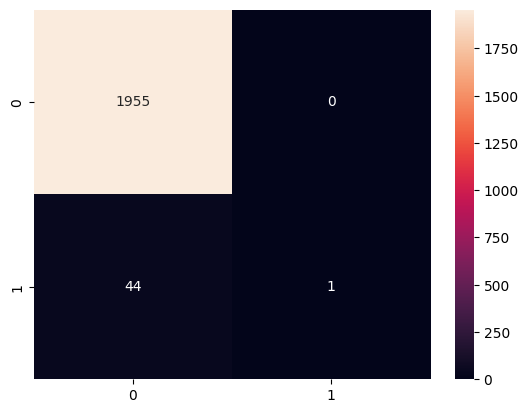

In [53]:
# 여기에 답안코드를 작성하세요.

y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(cf_matrix, annot=True, fmt='d')

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

#####
**DecisionTree 모델을 만들고 학습을 진행하세요.(단, max_depth는 10, random_state는 42, 변수명은 clf로 설정)</font>**

In [54]:

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=10, random_state=42)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9705

#####
**RandomForest 모델을 만들고 학습을 진행하세요. (단, n_estimators=100, random_state=42, 변수명은 rfc로 설정)</font>**

In [55]:

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.9765

#####
**XGBoost 모델을 만들고 학습을 진행하세요. (단, n_estimators=5, xgb_model로 변수명 저장)</font>**

In [56]:
# 아래 코드를 실행하세요.

!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [57]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(n_estimators=5)
xgb_model.fit(X_train, y_train)
xgb_model.score(X_test, y_test)

0.978

In [58]:
# X_test에 대한 예측 결과를 y_pred에 저장하세요
# y_test와 y_pred간의 confusion matrix를 출력하세요

y_pred = xgb_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[1953    2]
 [  42    3]]


#####
**Light GBM 모델을 만들고 학습을 진행하세요. (단, n_estimators=3, lgbm_model로 변수명 저장)</font>**

In [59]:
# 아래 코드를 실행하세요.

!pip install lightgbm


Defaulting to user installation because normal site-packages is not writeable


In [60]:
# lightgbm 모델을 만들고 학습을 진행하세요 n_estimators = 3

from lightgbm import LGBMClassifier
lgbm_model = LGBMClassifier(n_estimators=3)
lgbm_model.fit(X_train, y_train)
lgbm_model.score(X_test, y_test)

0.9775

In [61]:
# X_test에 대한 예측 결과를 y_pred에 저장하세요
# y_test와 y_pred간의 confusion matrix를 출력하세요

y_pred = lgbm_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[1955    0]
 [  45    0]]


<br>

## **<span style="color:black">딥러닝 모델링 & 모델 성능평가 및 그래프 출력</span>**

<font color=red>**다음 문항을 풀기 전에**</font> **아래 주어진 코드들을 실행해주세요.</font>**

In [62]:
# 다음 문항을 풀기 전에 아래 코드를 실행하세요.

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical

In [63]:
# 다음 문항을 풀기 전에 아래 코드를 실행하세요.

import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)

In [64]:
# 하이퍼파라미터 설정 : batch_size = 1024, epochs = 30

batch_size = 1024
epochs = 30

In [65]:
# 모델 입력(features) 갯수 확인

X_train.shape

(8000, 34)

In [66]:
# 모델 출력(label) 갯수 확인

y_train.shape

(8000,)

**<br>
<font color=blue>문제13. 아래 가이드대로 해지여부를 분류하는 딥러닝 모델을 만들려고 합니다. 아래 가이드에 따라 모델링하고 학습을 진행하세요.</font>**

+ Tensoflow의 Sequential() 함수를 사용하여 model로 저장하세요.
+ 첫번째 Hidden Layer : unit 64, activation='relu', input_shape=(34,) 입력
+ 두번째 Hidden Layer : unit 32 , activation='relu'
+ 세번째 Hidden Layer : unit 16 , activation='relu'
+ 각 Hidden Layer 마다 Dropout 0.2 비율로 되도록 하세요.
+ 마지막 Dense에서 'sigmoid' 설정하세요. (0.5 이하이면 정상, 아니면 해지)
+ 옵티마이저는 adam, 손실함수는 binary_crossentropy를 사용하세요.
+ EarlyStopping 콜백으로 정해진 epoch 동안 모니터링 지표가 향상되지 않을 때 훈련을 중지하도록 설정하세요 (모니터링 지표 : val_loss)
+ ModelCheckpoint 콜백으로 validation performance가 좋은 모델을 'my_checkpoint.ckpt' 파일로 저장하세요.(모니터링 지표 : val_loss)
+ EarlyStopping 객체는 es 변수에 ModelCheckpoint 객체는 mc 변수에 저장해서 활용해 주세요.
+ 학습정보는 history 변수에 저장하세요.

In [67]:
# 여기에 답안코드를 작성하세요.

model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(34,)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['acc'])

es = EarlyStopping(monitor='val_loss', patience=4, mode='min', verbose=1)
mc = ModelCheckpoint('my_checkpoint.ckpt', monitor='val_loss', save_best_only=True, verbose=1)

history = model.fit(X_train, y_train, 
                    batch_size=batch_size, 
                    epochs=epochs, 
                    callbacks=[es, mc],
                    validation_data=(X_test, y_test), 
                    verbose=1)

Epoch 1/30
1/8 [==>...........................] - ETA: 16s - loss: 0.7203 - acc: 0.4141
Epoch 1: val_loss improved from inf to 0.53907, saving model to my_checkpoint.ckpt
INFO:tensorflow:Assets written to: my_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: my_checkpoint.ckpt\assets


8/8 [==============================] - 5s 438ms/step - loss: 0.6409 - acc: 0.6927 - val_loss: 0.5391 - val_acc: 0.9775
Epoch 2/30
1/8 [==>...........................] - ETA: 0s - loss: 0.5449 - acc: 0.9170
Epoch 2: val_loss improved from 0.53907 to 0.39877, saving model to my_checkpoint.ckpt
INFO:tensorflow:Assets written to: my_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: my_checkpoint.ckpt\assets


8/8 [==============================] - 1s 184ms/step - loss: 0.4853 - acc: 0.9514 - val_loss: 0.3988 - val_acc: 0.9775
Epoch 3/30
1/8 [==>...........................] - ETA: 0s - loss: 0.4027 - acc: 0.9717
Epoch 3: val_loss improved from 0.39877 to 0.26710, saving model to my_checkpoint.ckpt
INFO:tensorflow:Assets written to: my_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: my_checkpoint.ckpt\assets


8/8 [==============================] - 1s 190ms/step - loss: 0.3496 - acc: 0.9725 - val_loss: 0.2671 - val_acc: 0.9775
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 0.2420 - acc: 0.9758
Epoch 4: val_loss improved from 0.26710 to 0.16853, saving model to my_checkpoint.ckpt
INFO:tensorflow:Assets written to: my_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: my_checkpoint.ckpt\assets


8/8 [==============================] - 1s 201ms/step - loss: 0.2420 - acc: 0.9758 - val_loss: 0.1685 - val_acc: 0.9775
Epoch 5/30
1/8 [==>...........................] - ETA: 0s - loss: 0.1979 - acc: 0.9756
Epoch 5: val_loss improved from 0.16853 to 0.12370, saving model to my_checkpoint.ckpt
INFO:tensorflow:Assets written to: my_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: my_checkpoint.ckpt\assets


8/8 [==============================] - 2s 295ms/step - loss: 0.1670 - acc: 0.9768 - val_loss: 0.1237 - val_acc: 0.9775
Epoch 6/30
1/8 [==>...........................] - ETA: 0s - loss: 0.1623 - acc: 0.9727
Epoch 6: val_loss improved from 0.12370 to 0.11376, saving model to my_checkpoint.ckpt
INFO:tensorflow:Assets written to: my_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: my_checkpoint.ckpt\assets


8/8 [==============================] - 2s 298ms/step - loss: 0.1392 - acc: 0.9774 - val_loss: 0.1138 - val_acc: 0.9775
Epoch 7/30
8/8 [==============================] - ETA: 0s - loss: 0.1297 - acc: 0.9776
Epoch 7: val_loss did not improve from 0.11376
8/8 [==============================] - 0s 17ms/step - loss: 0.1297 - acc: 0.9776 - val_loss: 0.1150 - val_acc: 0.9775
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 0.1291 - acc: 0.9776
Epoch 8: val_loss did not improve from 0.11376
8/8 [==============================] - 0s 17ms/step - loss: 0.1291 - acc: 0.9776 - val_loss: 0.1153 - val_acc: 0.9775
Epoch 9/30
1/8 [==>...........................] - ETA: 0s - loss: 0.1605 - acc: 0.9727
Epoch 9: val_loss improved from 0.11376 to 0.11282, saving model to my_checkpoint.ckpt
INFO:tensorflow:Assets written to: my_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: my_checkpoint.ckpt\assets


8/8 [==============================] - 2s 275ms/step - loss: 0.1251 - acc: 0.9776 - val_loss: 0.1128 - val_acc: 0.9775
Epoch 10/30
7/8 [=========================>....] - ETA: 0s - loss: 0.1158 - acc: 0.9787
Epoch 10: val_loss improved from 0.11282 to 0.11044, saving model to my_checkpoint.ckpt
INFO:tensorflow:Assets written to: my_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: my_checkpoint.ckpt\assets


8/8 [==============================] - 2s 298ms/step - loss: 0.1199 - acc: 0.9775 - val_loss: 0.1104 - val_acc: 0.9775
Epoch 11/30
1/8 [==>...........................] - ETA: 0s - loss: 0.1191 - acc: 0.9785
Epoch 11: val_loss improved from 0.11044 to 0.10826, saving model to my_checkpoint.ckpt
INFO:tensorflow:Assets written to: my_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: my_checkpoint.ckpt\assets


8/8 [==============================] - 2s 308ms/step - loss: 0.1217 - acc: 0.9776 - val_loss: 0.1083 - val_acc: 0.9775
Epoch 12/30
7/8 [=========================>....] - ETA: 0s - loss: 0.1148 - acc: 0.9787
Epoch 12: val_loss improved from 0.10826 to 0.10646, saving model to my_checkpoint.ckpt
INFO:tensorflow:Assets written to: my_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: my_checkpoint.ckpt\assets


8/8 [==============================] - 2s 241ms/step - loss: 0.1180 - acc: 0.9776 - val_loss: 0.1065 - val_acc: 0.9775
Epoch 13/30
1/8 [==>...........................] - ETA: 0s - loss: 0.0894 - acc: 0.9844
Epoch 13: val_loss improved from 0.10646 to 0.10503, saving model to my_checkpoint.ckpt
INFO:tensorflow:Assets written to: my_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: my_checkpoint.ckpt\assets


8/8 [==============================] - 2s 218ms/step - loss: 0.1180 - acc: 0.9774 - val_loss: 0.1050 - val_acc: 0.9775
Epoch 14/30
7/8 [=========================>....] - ETA: 0s - loss: 0.1224 - acc: 0.9775
Epoch 14: val_loss improved from 0.10503 to 0.10331, saving model to my_checkpoint.ckpt
INFO:tensorflow:Assets written to: my_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: my_checkpoint.ckpt\assets


8/8 [==============================] - 1s 201ms/step - loss: 0.1221 - acc: 0.9776 - val_loss: 0.1033 - val_acc: 0.9775
Epoch 15/30
1/8 [==>...........................] - ETA: 0s - loss: 0.1240 - acc: 0.9785
Epoch 15: val_loss improved from 0.10331 to 0.10200, saving model to my_checkpoint.ckpt
INFO:tensorflow:Assets written to: my_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: my_checkpoint.ckpt\assets


8/8 [==============================] - 1s 177ms/step - loss: 0.1183 - acc: 0.9776 - val_loss: 0.1020 - val_acc: 0.9775
Epoch 16/30
1/8 [==>...........................] - ETA: 0s - loss: 0.1114 - acc: 0.9795
Epoch 16: val_loss improved from 0.10200 to 0.10121, saving model to my_checkpoint.ckpt
INFO:tensorflow:Assets written to: my_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: my_checkpoint.ckpt\assets


8/8 [==============================] - 2s 289ms/step - loss: 0.1147 - acc: 0.9776 - val_loss: 0.1012 - val_acc: 0.9775
Epoch 17/30
8/8 [==============================] - ETA: 0s - loss: 0.1148 - acc: 0.9776
Epoch 17: val_loss improved from 0.10121 to 0.10033, saving model to my_checkpoint.ckpt
INFO:tensorflow:Assets written to: my_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: my_checkpoint.ckpt\assets


8/8 [==============================] - 2s 306ms/step - loss: 0.1148 - acc: 0.9776 - val_loss: 0.1003 - val_acc: 0.9775
Epoch 18/30
1/8 [==>...........................] - ETA: 0s - loss: 0.1048 - acc: 0.9775
Epoch 18: val_loss improved from 0.10033 to 0.09939, saving model to my_checkpoint.ckpt
INFO:tensorflow:Assets written to: my_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: my_checkpoint.ckpt\assets


8/8 [==============================] - 2s 313ms/step - loss: 0.1140 - acc: 0.9776 - val_loss: 0.0994 - val_acc: 0.9775
Epoch 19/30
7/8 [=========================>....] - ETA: 0s - loss: 0.1126 - acc: 0.9778
Epoch 19: val_loss improved from 0.09939 to 0.09821, saving model to my_checkpoint.ckpt
INFO:tensorflow:Assets written to: my_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: my_checkpoint.ckpt\assets


8/8 [==============================] - 2s 345ms/step - loss: 0.1139 - acc: 0.9776 - val_loss: 0.0982 - val_acc: 0.9775
Epoch 20/30
7/8 [=========================>....] - ETA: 0s - loss: 0.1114 - acc: 0.9778
Epoch 20: val_loss improved from 0.09821 to 0.09712, saving model to my_checkpoint.ckpt
INFO:tensorflow:Assets written to: my_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: my_checkpoint.ckpt\assets


8/8 [==============================] - 2s 306ms/step - loss: 0.1110 - acc: 0.9776 - val_loss: 0.0971 - val_acc: 0.9775
Epoch 21/30
8/8 [==============================] - ETA: 0s - loss: 0.1108 - acc: 0.9776
Epoch 21: val_loss improved from 0.09712 to 0.09624, saving model to my_checkpoint.ckpt
INFO:tensorflow:Assets written to: my_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: my_checkpoint.ckpt\assets


8/8 [==============================] - 1s 206ms/step - loss: 0.1108 - acc: 0.9776 - val_loss: 0.0962 - val_acc: 0.9775
Epoch 22/30
1/8 [==>...........................] - ETA: 0s - loss: 0.0925 - acc: 0.9795
Epoch 22: val_loss improved from 0.09624 to 0.09563, saving model to my_checkpoint.ckpt
INFO:tensorflow:Assets written to: my_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: my_checkpoint.ckpt\assets


8/8 [==============================] - 2s 227ms/step - loss: 0.1094 - acc: 0.9776 - val_loss: 0.0956 - val_acc: 0.9775
Epoch 23/30
8/8 [==============================] - ETA: 0s - loss: 0.1061 - acc: 0.9776
Epoch 23: val_loss improved from 0.09563 to 0.09491, saving model to my_checkpoint.ckpt
INFO:tensorflow:Assets written to: my_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: my_checkpoint.ckpt\assets


8/8 [==============================] - 1s 186ms/step - loss: 0.1061 - acc: 0.9776 - val_loss: 0.0949 - val_acc: 0.9775
Epoch 24/30
1/8 [==>...........................] - ETA: 0s - loss: 0.1212 - acc: 0.9727
Epoch 24: val_loss improved from 0.09491 to 0.09431, saving model to my_checkpoint.ckpt
INFO:tensorflow:Assets written to: my_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: my_checkpoint.ckpt\assets


8/8 [==============================] - 2s 259ms/step - loss: 0.1059 - acc: 0.9776 - val_loss: 0.0943 - val_acc: 0.9775
Epoch 25/30
8/8 [==============================] - ETA: 0s - loss: 0.1047 - acc: 0.9776
Epoch 25: val_loss improved from 0.09431 to 0.09346, saving model to my_checkpoint.ckpt
INFO:tensorflow:Assets written to: my_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: my_checkpoint.ckpt\assets


8/8 [==============================] - 2s 289ms/step - loss: 0.1047 - acc: 0.9776 - val_loss: 0.0935 - val_acc: 0.9775
Epoch 26/30
8/8 [==============================] - ETA: 0s - loss: 0.1051 - acc: 0.9776
Epoch 26: val_loss improved from 0.09346 to 0.09296, saving model to my_checkpoint.ckpt
INFO:tensorflow:Assets written to: my_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: my_checkpoint.ckpt\assets


8/8 [==============================] - 2s 303ms/step - loss: 0.1051 - acc: 0.9776 - val_loss: 0.0930 - val_acc: 0.9775
Epoch 27/30
8/8 [==============================] - ETA: 0s - loss: 0.1028 - acc: 0.9776
Epoch 27: val_loss improved from 0.09296 to 0.09264, saving model to my_checkpoint.ckpt
INFO:tensorflow:Assets written to: my_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: my_checkpoint.ckpt\assets


8/8 [==============================] - 2s 312ms/step - loss: 0.1028 - acc: 0.9776 - val_loss: 0.0926 - val_acc: 0.9775
Epoch 28/30
7/8 [=========================>....] - ETA: 0s - loss: 0.1047 - acc: 0.9777
Epoch 28: val_loss improved from 0.09264 to 0.09231, saving model to my_checkpoint.ckpt
INFO:tensorflow:Assets written to: my_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: my_checkpoint.ckpt\assets


8/8 [==============================] - 2s 297ms/step - loss: 0.1043 - acc: 0.9776 - val_loss: 0.0923 - val_acc: 0.9775
Epoch 29/30
1/8 [==>...........................] - ETA: 0s - loss: 0.1072 - acc: 0.9766
Epoch 29: val_loss improved from 0.09231 to 0.09170, saving model to my_checkpoint.ckpt
INFO:tensorflow:Assets written to: my_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: my_checkpoint.ckpt\assets


8/8 [==============================] - 2s 276ms/step - loss: 0.1002 - acc: 0.9776 - val_loss: 0.0917 - val_acc: 0.9775
Epoch 30/30
1/8 [==>...........................] - ETA: 0s - loss: 0.1099 - acc: 0.9766
Epoch 30: val_loss improved from 0.09170 to 0.09128, saving model to my_checkpoint.ckpt
INFO:tensorflow:Assets written to: my_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: my_checkpoint.ckpt\assets


8/8 [==============================] - 2s 215ms/step - loss: 0.1014 - acc: 0.9776 - val_loss: 0.0913 - val_acc: 0.9775


**<br>
<font color=blue>문제14. 딥러닝 모델의 성능을 평가하려고 합니다. Matplotlib 라이브러리 활용해서 학습 손실과 검증 손실을 그래프로 표시하세요.</font>**
**<br>
<font color=blue>1개의 그래프에 학습 손실과 검증 손실 2가지를 모두 표시하세요.</font>**
**<br>
<font color=blue>가로 10, 세로 5로 그래프 크기 설정, figsize=(10,5)</font>**
**<br>
<font color=blue>범례는 'Train Loss'와 'Validation Loss'로 표시하세요. x축에는 'Epochs', y축에는 'Loss'라고 표시하세요. </font>**


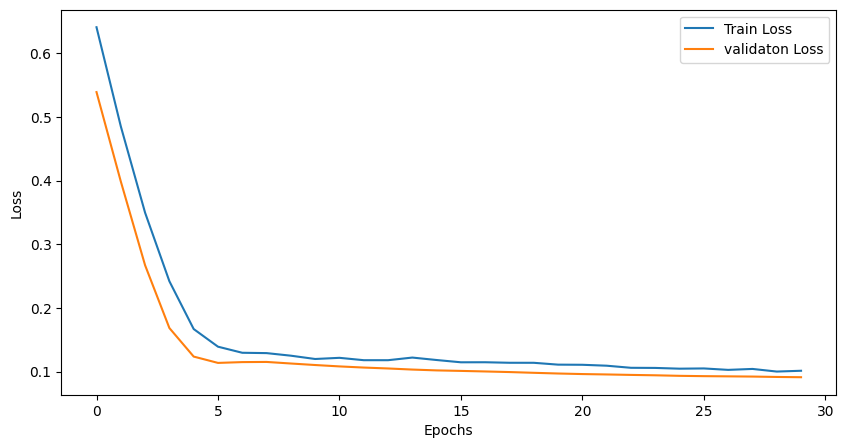

In [68]:
# 여기에 답안코드를 작성하세요.

plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='validaton Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

####
### 1번부터 14번까지 모든 문제를 풀었습니다. 수고 많으셨습니다.

### 향후 정답과 비교하며 반복해서 연습해보시기 바랍니다.

### 이제 Wrap-up을 위해 전체 발표모임으로 모여주세요!